In [1]:
from __future__ import print_function, division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

import thinkstats2_mod
import thinkplot

import statsmodels.formula.api as smf

In [2]:
dct = thinkstats2_mod.ReadStataDct('GSS/GSS.dct')
df = dct.ReadFixedWidth('GSS/GSS.dat')
print('Total number of respondents: %i' %(df.shape[0] + 1))

Total number of respondents: 62467


In [3]:
# Filter out years without relevant data
df = df[df.year >= 1974]
print('Number of respondents left: %i' %(df.shape[0] + 1))

# Filter out invalid polviews
df = df[df.polviews <= 7]
df = df[df.polviews > 0]

# Center polviews likert scale around 0
df['polviews'] = np.subtract(df['polviews'], 4)
print('Number of respondents left: %i' %(df.shape[0] + 1))

# Filter out marital status no answers
df = df[df.marital != 9]
print('Number of respondents left: %i' %(df.shape[0] + 1))

df_control = df.copy(deep=True)

Number of respondents left: 59350
Number of respondents left: 53082
Number of respondents left: 53064


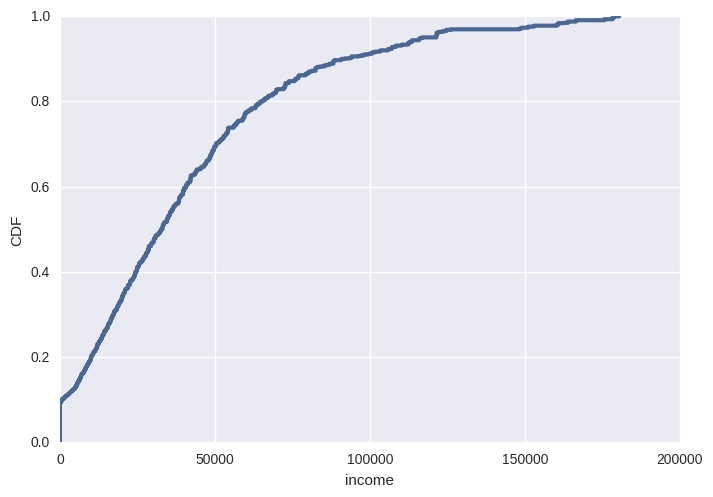

In [4]:
cdf = thinkstats2_mod.Cdf(df.coninc)

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='income', ylabel='CDF')
thinkplot.Show()

/home/william/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


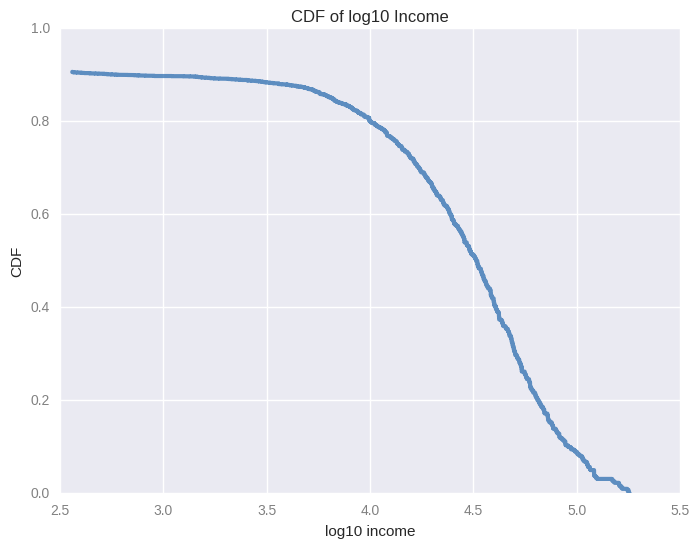

In [11]:
cdf = thinkstats2_mod.Cdf(np.log10(df.coninc))

ax = plt.axes()
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')

thinkplot.Cdf(cdf, complement=True, color='#2166ac')
thinkplot.Config(xlabel='log10 income', ylabel='CDF', title='CDF of log10 Income')
plt.savefig('Plots/cdf_income.svg', bbox_inches='tight')
thinkplot.Show()

In [12]:
formula = 'df_control.polviews ~ df_control.marital + df_control.coninc'
model = smf.ols(formula, data=df_control)
results = model.fit()
params_marital = results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     df_control.polviews   R-squared:                       0.020
Model:                             OLS   Adj. R-squared:                  0.020
Method:                  Least Squares   F-statistic:                     553.1
Date:                 Mon, 01 May 2017   Prob (F-statistic):          1.91e-238
Time:                         22:56:39   Log-Likelihood:                -91733.
No. Observations:                53063   AIC:                         1.835e+05
Df Residuals:                    53060   BIC:                         1.835e+05
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3937      0.014     28.971      0.000       0.367       0.420
df_control.marital    -0.1222      0.004    -32.523      0.000      -0.130      -0.115
df_control.coninc  -1.692e-07   1.63e-07     -1.040      0.299   -4.88e-07     1.5e-07
==============================================================================
Omnibus:                      383.545   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.905
Skew:                          -0.068   Prob(JB):                     4.51e-61
Kurtosis:                       2.672   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

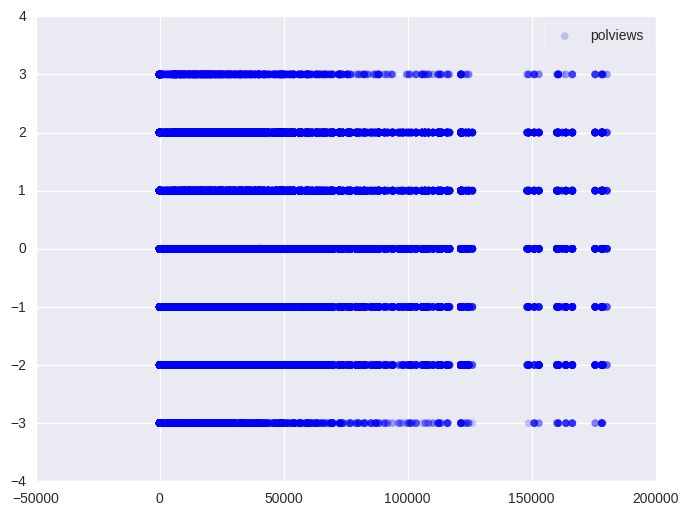

In [13]:
thinkplot.Scatter(df.coninc, df.polviews, alpha=0.2)
thinkplot.Show()

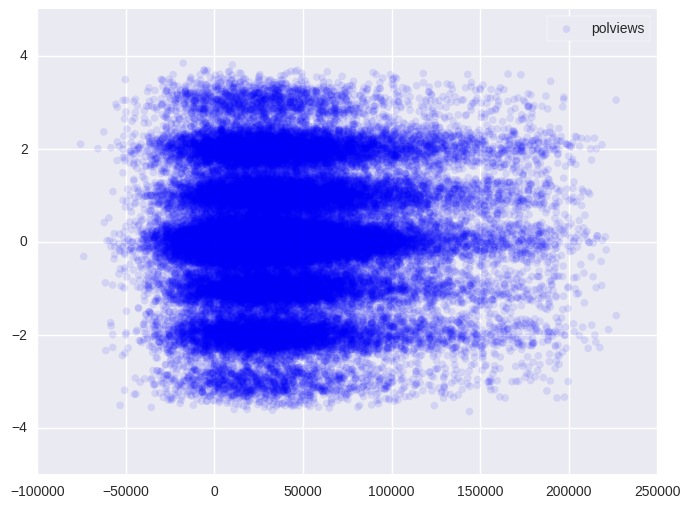

In [14]:
incomes = thinkstats2_mod.Jitter(df.coninc, 20000.0)
polviews = thinkstats2_mod.Jitter(df.polviews, 0.25)

thinkplot.Scatter(incomes, polviews, alpha=0.1)
thinkplot.Show()

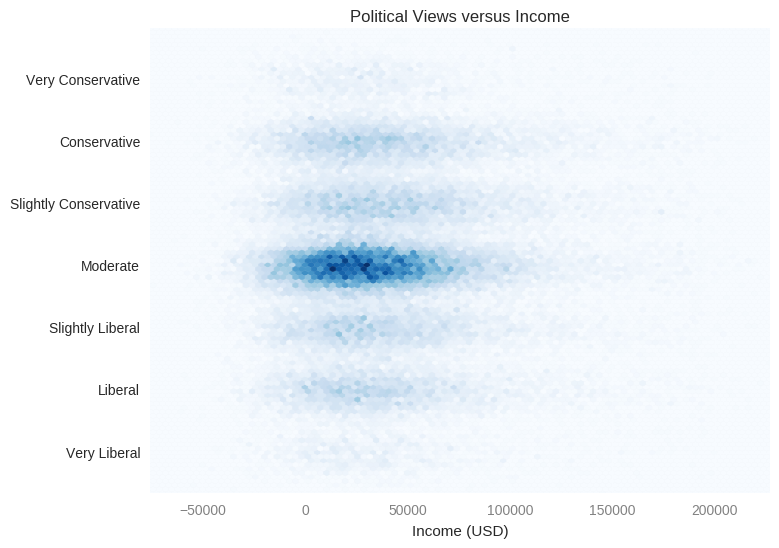

In [36]:
thinkplot.HexBin(incomes, polviews)

ax = plt.axes()
for tick in ax.get_xticklabels():
    tick.set_color('gray')
    
pol_views = ('Very Liberal', 'Liberal', 'Slightly Liberal', 'Moderate', 'Slightly Conservative', 'Conservative', 'Very Conservative')
thinkplot.Config(xlabel='Income (USD)', legend=False, title='Political Views versus Income')
plt.yticks([-3, -2, -1, 0, 1, 2, 3], pol_views)
plt.savefig('Plots/income_hexbin.svg', bbox_inches='tight')
thinkplot.Show()